In [1]:
import pandas as pd

In [2]:
file4= pd.read_excel('Popularity_voltraded.xlsx')

In [3]:
file4.head()

,index,Label,date,open,high,low,close,volume,traded
0,0,AAPL,12-12-1980,0.4164,0.4182,0.4164,0.4164,117258400,48826397.76
1,1,AAPL,15-12-1980,0.3966,0.3966,0.3947,0.3947,43971200,17355432.64
2,2,AAPL,16-12-1980,0.3675,0.3675,0.3657,0.3657,26432000,9666182.40
3,3,AAPL,17-12-1980,0.3747,0.3766,0.3747,0.3747,21610400,8097416.88
4,4,AAPL,18-12-1980,0.3857,0.3874,0.3857,0.3857,18362400,7082377.68


In [4]:
file5 = file4.groupby(['Label'])['traded'].mean().reset_index()

In [5]:
file5

,Label,traded
0,AAPL,1.747556e+09
1,AMZN,1.172191e+09
2,BA,1.357894e+08
3,BAC,7.453203e+08
4,CMCSA,2.436741e+08
5,DIS,1.469083e+08
6,FB,2.823281e+09
7,GOOGL,2.037762e+09
8,HSBC,5.176163e+07
9,IBM,2.551802e+08


In [6]:
file5.columns


Index(['Label', 'traded'], dtype='object')

In [7]:
data = pd.DataFrame(file5)

In [8]:
data

,Label,traded
0,AAPL,1.747556e+09
1,AMZN,1.172191e+09
2,BA,1.357894e+08
3,BAC,7.453203e+08
4,CMCSA,2.436741e+08
5,DIS,1.469083e+08
6,FB,2.823281e+09
7,GOOGL,2.037762e+09
8,HSBC,5.176163e+07
9,IBM,2.551802e+08


In [9]:
data.columns

Index(['Label', 'traded'], dtype='object')

In [10]:
type(data)

pandas.core.frame.DataFrame

In [11]:
data_new = data['traded'].reset_index()

In [12]:
type(data_new)

pandas.core.frame.DataFrame

In [13]:
data_new.head()

,index,traded
0,0,1.747556e+09
1,1,1.172191e+09
2,2,1.357894e+08
3,3,7.453203e+08
4,4,2.436741e+08


In [18]:
from sklearn.cluster import MeanShift

clustering =MeanShift(bandwidth=4).fit(data_new)
clustering.labels_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

Text(0.5,1,'Mean Shift')

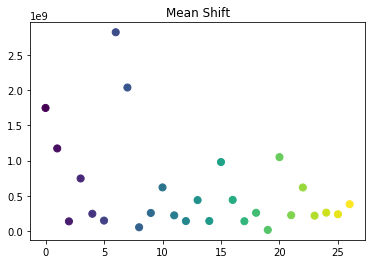

In [20]:
import matplotlib.pyplot as plt
plt.scatter(data_new['index'], data_new['traded'], c=clustering.labels_,
            s=50, cmap='viridis');
plt.title('Mean Shift')


In [22]:
from sklearn.cluster import KMeans
import numpy as np

X = data_new
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
print(kmeans.labels_)

#kmeans.predict([[43]])

print(kmeans.cluster_centers_)

[1 2 0 3 0 0 4 1 0 0 3 0 0 3 0 2 3 0 0 0 2 0 3 0 0 0 3]
[[1.41333333e+01 1.78816948e+08]
 [3.50000000e+00 1.89265920e+09]
 [1.20000000e+01 1.06652288e+09]
 [1.50000000e+01 5.39820620e+08]
 [6.00000000e+00 2.82328117e+09]]


Text(0.5,1,'Based  on Popuarity')

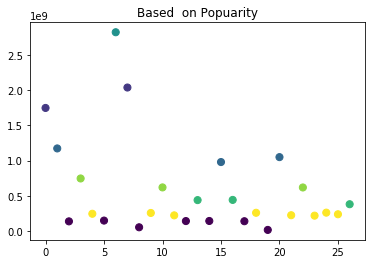

In [23]:
labels = KMeans(7, random_state=0).fit_predict(data_new)
plt.scatter(data_new['index'], data_new['traded'], c=labels,
            s=50, cmap='viridis');
plt.title('Based  on Popuarity')


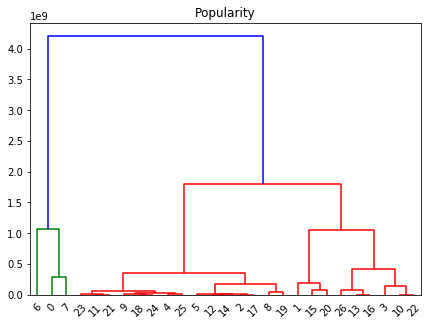

In [24]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(7, 5))  
plt.title("Popularity")  
dend = shc.dendrogram(shc.linkage(data_new, method='ward')) 

In [25]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
labels=cluster.fit_predict(data_new) 
labels

array([1, 4, 2, 0, 2, 2, 3, 1, 2, 2, 0, 2, 2, 0, 2, 4, 0, 2, 2, 2, 4, 2,
       0, 2, 2, 2, 0], dtype=int64)

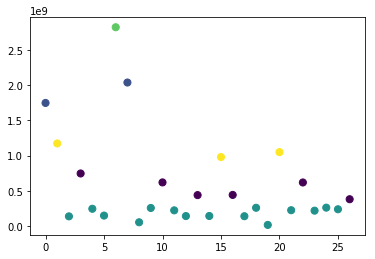

In [26]:
plt.scatter(data_new['index'], data_new['traded'], c=labels,
            s=50, cmap='viridis');

In [27]:
data_new.head()

,index,traded
0,0,1.747556e+09
1,1,1.172191e+09
2,2,1.357894e+08
3,3,7.453203e+08
4,4,2.436741e+08


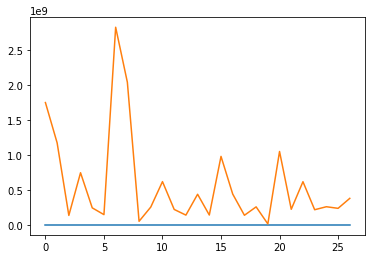

In [28]:
plt.plot(data_new) # plotting by columns
plt.show()

[1 4 7 0 2 7 3 6 7 2 0 2 7 5 7 4 5 7 2 7 4 2 0 2 2 2 5]
[2 0 1 0 1 1 2 2 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1]
[2 1 0 1 0 0 2 2 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0]


C:\Users\hjtas\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


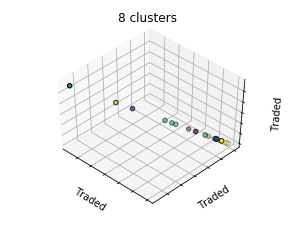

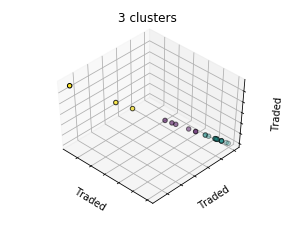

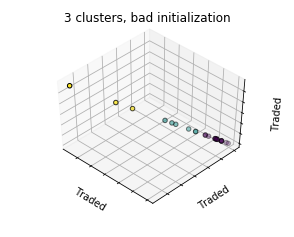

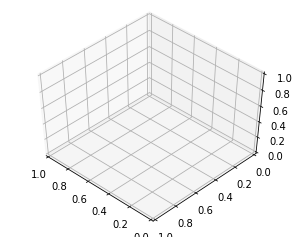

In [29]:

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

#iris = datasets.load_iris()
X = data_new


estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
    print(labels)

  

    ax.scatter(X['traded'][:], X['traded'][:], X['traded'][:],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Traded')
    ax.set_ylabel('Traded')
    ax.set_zlabel('Traded')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)



fig.show()